In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tree_df = pd.read_csv('tree_scores.csv').drop(columns=["Unnamed: 0", "Test #"])
tree_df.index += 1
mlp_df = pd.read_csv('mlp_scores.csv').drop(columns=["Unnamed: 0", "Test #"])
mlp_df.index += 1
print("TREE")
display(tree_df.mean())
print("MLP")
display(mlp_df.mean())


TREE


Accuracy       0.897017
Sensitivity    0.996455
Specificity    0.814437
dtype: float64

MLP


Accuracy       0.935076
Sensitivity    0.995409
Specificity    0.872692
dtype: float64

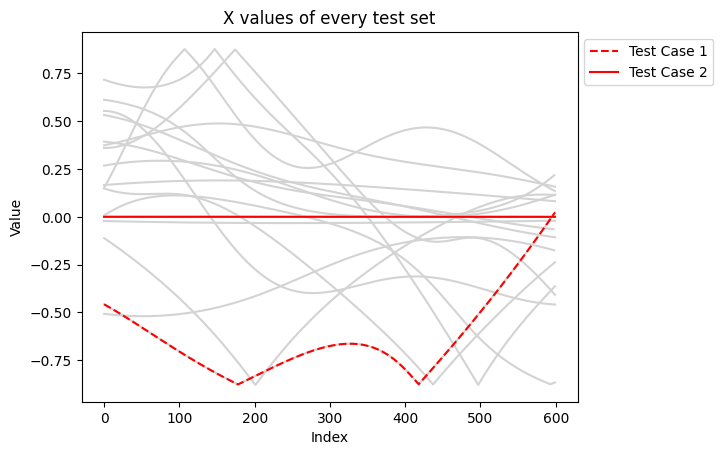

<Figure size 3000x1000 with 0 Axes>

In [73]:
import os
from sklearn.model_selection import train_test_split
file_array = os.listdir('../training_sets_nudge')
X_tests = []
for i in range(len(file_array)):
    df = pd.read_csv("../training_sets_nudge/"+file_array[i])
    df = df.drop(columns=["time"])
    n = len(df)
    label_df = []
    data_df = df.iloc[:-1]
    
    temp_df = df['x'].iloc[1:]
    
    for i in range(n-1):
        if data_df['x'][i] < temp_df.get(i+1):
            label_df.insert(i, 1) #right 
        else:
            label_df.insert(i, 0) #left

    X = data_df
    y = pd.Series(data=label_df, name="direction")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, shuffle=False)
    X_tests.append(X_test["x"].values)
        

# Assuming X_tests is a list containing arrays
for i, X_test_array in enumerate(X_tests):
    if i != 0 or 1:  # specify the index of the line you want to differentiate
        plt.plot(X_test_array, color='lightgrey')  # specify the color for the differentiated line

plt.plot(X_tests[0], label=f'Test Case {1}', color='red', linestyle='--')
plt.plot(X_tests[1], label=f'Test Case {2}', color='red')
#plt.plot(X_tests[6], label=f'Test Case {7}', color='blue', linestyle='--')
#plt.plot(X_tests[7], label=f'Test Case {8}', color='blue')
#plt.plot(X_tests[10], label=f'Test Case {11}', color='green', linestyle='--')
#plt.plot(X_tests[11], label=f'Test Case {12}', color='green')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('X values of every test set')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.figure(figsize=(30, 10))
plt.show()
        

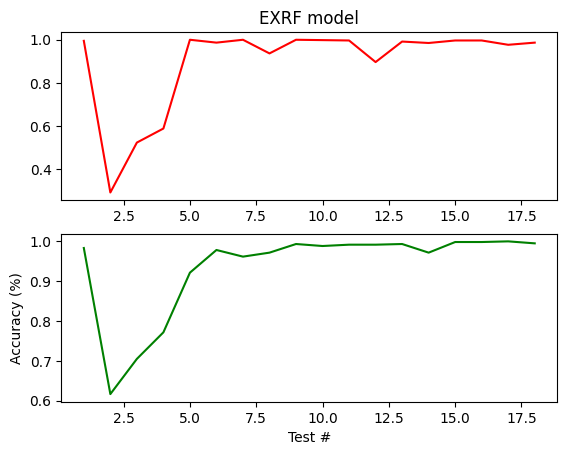

<Figure size 2000x1000 with 0 Axes>

In [39]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(tree_df["Accuracy"], 'r')
ax2.plot(mlp_df["Accuracy"], 'g')
ax1.set_title("EXRF model")
plt.xlabel("Test #")
plt.ylabel("Accuracy (%)")
plt.figure(figsize=(20, 10))
plt.show()

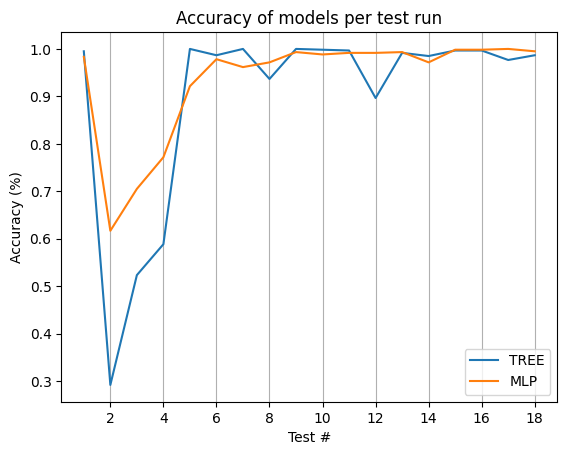

In [40]:
plt.clf()
x = tree_df["Accuracy"]
y = mlp_df["Accuracy"]
plt.plot(x, label="TREE")
plt.plot(y, label="MLP")
plt.locator_params(axis='x', nbins=len(x))
plt.title("Accuracy of models per test run")
plt.xlabel("Test #")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True, axis='x')
plt.show()